In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss 
from matplotlib.colors import ListedColormap 
from sklearn.neighbors import KNeighborsClassifier
import random

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
predictors=iris.data[:,0:4]
outcomes=iris.target

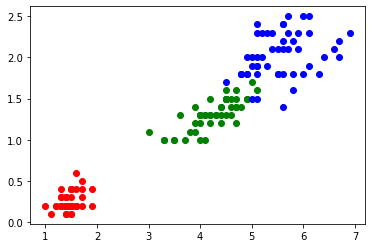

In [5]:
#petal length and width
plt.plot(predictors[outcomes == 0][:, 2], predictors[outcomes == 0][:, 3], "ro") 
plt.plot(predictors[outcomes == 1][:, 2], predictors[outcomes == 1][:, 3], "go") 
plt.plot(predictors[outcomes == 2][:, 2], predictors[outcomes == 2][:, 3], "bo") 

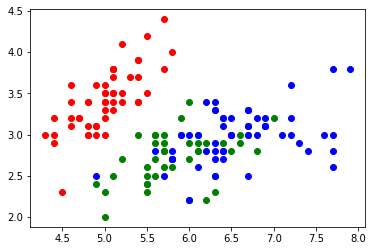

In [6]:
#sepal length and width
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro") 
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go") 
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo") 

In [7]:
predictors=iris.data[:,2:4]
outcomes=iris.target

In [8]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1,2))) #l2 distance

In [9]:
def majority_vote(votes): 
    vote_counts = {} 
    for vote in votes: 
        if vote in vote_counts: 
           vote_counts[vote]+= 1
        else: 
            vote_counts[vote]= 1
    winners = [] 
    max_count = max(vote_counts.values()) 
    for vote, count in vote_counts.items(): 
        if count == max_count: 
            winners.append(vote) 
    return random.choice(winners)

In [10]:
def majority_vote_short(votes): 
    mode, count = ss.mstats.mode(votes) 
    return mode

In [11]:
def find_nearest_neighbours(p, points, k = 5):  #algorithm to find the nearest neighbours 
    distances = np.zeros(points.shape[0]) 
    for i in range(len(distances)): 
        distances[i]= distance(p, points[i]) 
    ind = np.argsort(distances)      #returns index, according to sorted values in array 
    return ind[:k]

In [12]:
def knn_predict(p, points, outcomes, k = 5): 
    ind = find_nearest_neighbours(p, points, k) 
    return majority_vote(outcomes[ind])

In [13]:
def make_prediction_grid(predictors, outcomes, limits, h, k): 
    (x_min, x_max, y_min, y_max) = limits 
    xs = np.arange(x_min, x_max, h) 
    ys = np.arange(y_min, y_max, h) 
    xx, yy = np.meshgrid(xs, ys) 
  
    prediction_grid = np.zeros(xx.shape, dtype = int) 
    for i, x in enumerate(xs): 
        for j, y in enumerate(ys): 
            p = np.array([x, y]) 
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k) 
    return (xx, yy, prediction_grid)

In [14]:
def plot_prediction_grid (xx, yy, prediction_grid, filename=None): 
    """ Plot KNN predictions for every point on the grid."""
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"]) 
    observation_colormap = ListedColormap (["red", "blue", "green"]) 
    plt.figure(figsize =(10, 10)) 
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5) 
    plt.scatter(predictors[:, 0], predictors [:, 1], c = outcomes, cmap = observation_colormap, s = 50) 
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2') 
    plt.xticks(()); plt.yticks(()) 
    plt.xlim (np.min(xx), np.max(xx)) 
    plt.ylim (np.min(yy), np.max(yy)) 
    #plt.savefig(filename) 
    plt.show()

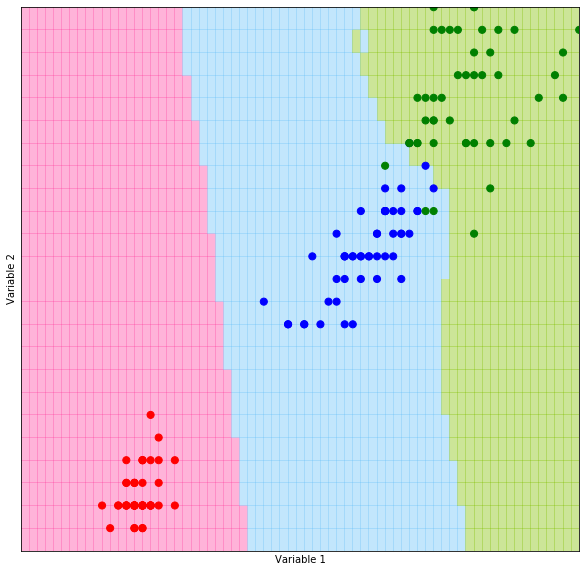

In [15]:
k = 5
filename ="iris_grid.pdf"
limits =(0, 7, 0, 2.5)
h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k) 
plot_prediction_grid(xx, yy, prediction_grid, filename) 
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(predictors, outcomes) 
sk_predictions = knn.predict(predictors) 
  
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors]) 
  
   # >>>sk_predictions == my_predictions 
   # >>>np.mean(sk_predictions == my_predictions) 
print(" prediction by scikit learn : ") 
print(100 * np.mean(sk_predictions == outcomes)) 
print(" prediction by own model : ") 
print(100 * np.mean(my_predictions == outcomes))     
 # our homemade predicter is actually somewhat better 

 prediction by scikit learn : 
96.0
 prediction by own model : 
96.0
